Gráficos de frequências de valores ausentes

<class 'pandas.core.series.Series'>


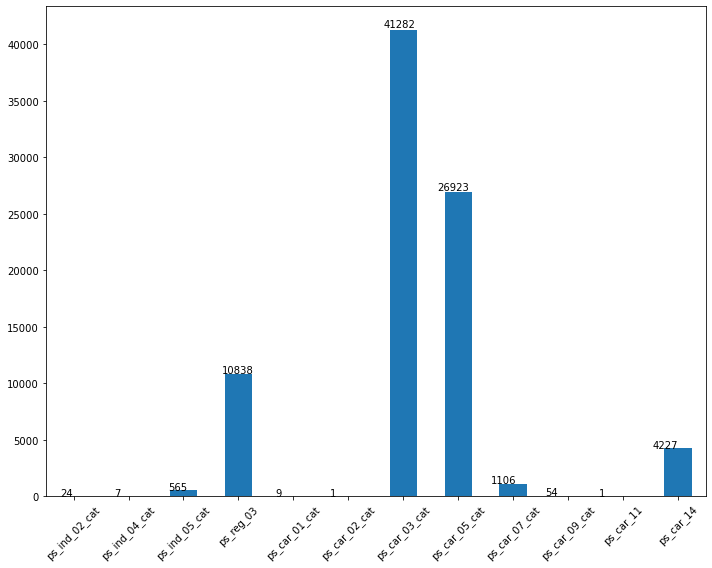

In [14]:
from utils import graficos
graficos.grafico_missing_values()

Preparação dos dados para o experimento

In [7]:
from utils import db
from tratamento_dados import normalizacao, valores_ausentes, balanceamento, reducao_dimensionalidade
from sklearn.model_selection import train_test_split

# Obtém uma amostra de 10%, separada em atributos e rótulos
X, y = db.get_amostra_base(percentual=0.1)

# Tratamento inicial de dados - Normalização e Valores ausentes
X = valores_ausentes.tratar_valores_ausentes(X)
X = normalizacao.normalizar_dados(X)
X = reducao_dimensionalidade.reducao_pca(X)

# Separação dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)
X_train, y_train = balanceamento.balanceamento(X_train, y_train)

O balancemaneo dos dados iniciou...
O balanceamento dos dados terminou e levou  299.75845193862915  segundos!


In [22]:
from otimizacao import hiperparametros as hiper

Início da otimização de parâmetros

In [24]:
# from otimizacao import  hiperparametros as hiper

X_train, X_vld, y_train, y_vld = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

Melhores hiperparâmetros para o K-NN

In [25]:
%%capture --no-stdout
from sklearn.neighbors import KNeighborsClassifier

# Modelo K-NN
modelo_knn = KNeighborsClassifier()
grid_knn = hiper.melhores_hiperparametros(modelo_knn, hiper.conjunto_de_hiper_parametros()['knn'], X_train, X_vld, y_train, y_vld)

print('Melhores hiperparâmetros para o K-NN')


#vld_knn = vl.validacao_5x2(modelo_knn, X_train, y_train)
# print(vld_knn)
#vld_knn
grid_knn

              precision    recall  f1-score   support

           0       0.52      0.96      0.68       347
           1       0.77      0.12      0.21       347

    accuracy                           0.54       694
   macro avg       0.65      0.54      0.45       694
weighted avg       0.65      0.54      0.45       694

Melhores hiperparâmetros para o K-NN


In [26]:
grid_knn.to_csv(r'resultados/pos_trat_knn_hyper.csv', index = False, header=True)
grid_knn

,n_neighbors
0,27


Melhores hiperparâmetros para o MLP

In [27]:
%%capture --no-stdout
from sklearn.neural_network import MLPClassifier

modelo_mlp = MLPClassifier()


grid_mlp = hiper.melhores_hiperparametros(modelo_mlp, hiper.conjunto_de_hiper_parametros()['mlp'], X_train, X_vld, y_train, y_vld)


              precision    recall  f1-score   support

           0       0.94      0.91      0.93       347
           1       0.91      0.94      0.93       347

    accuracy                           0.93       694
   macro avg       0.93      0.93      0.93       694
weighted avg       0.93      0.93      0.93       694



In [28]:
grid_mlp.to_csv(r'resultados/pos_trat_mlp_hyper.csv', index = False, header=True)
grid_mlp

,activation,hidden_layer_sizes,learning_rate_init
0,logistic,20,0.01


Melhores hiperparâmetros para o LVQ

In [29]:
%%capture --no-stdout
from sklearn_lvq import GlvqModel

modelo_lvq = GlvqModel()

grid_lvq = hiper.melhores_hiperparametros(modelo_lvq, hiper.conjunto_de_hiper_parametros()['lvq'], X_train, X_vld, y_train, y_vld)

              precision    recall  f1-score   support

           0       0.52      0.89      0.66       347
           1       0.63      0.19      0.30       347

    accuracy                           0.54       694
   macro avg       0.58      0.54      0.48       694
weighted avg       0.58      0.54      0.48       694



In [30]:
grid_lvq.to_csv(r'resultados/pos_trat_lvq_hyper.csv', index = False, header=True)
grid_lvq


,prototypes_per_class
0,3


Melhores hiperparâmetros para árvore de decisão

In [31]:
%%capture --no-stdout
from sklearn import tree
modelo_tree = tree.DecisionTreeClassifier()

grid_tree = hiper.melhores_hiperparametros(modelo_tree, hiper.conjunto_de_hiper_parametros()['tree'], X_train, X_vld, y_train, y_vld)


              precision    recall  f1-score   support

           0       0.81      0.90      0.86       347
           1       0.89      0.79      0.84       347

    accuracy                           0.85       694
   macro avg       0.85      0.85      0.85       694
weighted avg       0.85      0.85      0.85       694



In [32]:
grid_tree.to_csv(r'resultados/pos_trat_tree_hyper.csv', index = False, header=True)
grid_tree

,criterion,max_depth,min_samples_leaf,min_samples_split
0,entropy,9,4,2


In [33]:
%%capture --no-stdout
from sklearn import svm
modelo_svm = svm.SVC()

grid_svm = hiper.melhores_hiperparametros(modelo_svm, hiper.conjunto_de_hiper_parametros()['svm'], X_train, X_vld, y_train, y_vld)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       347
           1       0.96      0.95      0.96       347

    accuracy                           0.96       694
   macro avg       0.96      0.96      0.96       694
weighted avg       0.96      0.96      0.96       694



In [34]:


grid_svm.to_csv(r'resultados/pos_trat_svm_hyper.csv', index = False, header=True)
grid_svm

,C,kernel
0,10,rbf


Validação cruzada 5 x 2

Validação cruzada

In [39]:
import validacao_cruzada as vl

from sklearn.model_selection import train_test_split
from utils import db
from tratamento_dados import normalizacao, valores_ausentes
from sklearn.model_selection import train_test_split

# Importando os classificadores 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn_lvq import GlvqModel
from sklearn import tree
from sklearn import svm


# Obtém uma amostra de 5%, separada em atributos e rótulos
X, y = db.get_amostra_base(percentual=0.1)

# Tratamento inicial de dados - Normalização e Valores ausentes
X = valores_ausentes.tratar_valores_ausentes(X)
X = normalizacao.normalizar_dados(X)

# Separação dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

In [9]:

# Modelo K-NN
modelo_knn = KNeighborsClassifier(n_neighbors=27)
vld_knn = vl.validacao_5x2(modelo_knn, X_train, y_train)

# Modelo MLP
modelo_mlp  = MLPClassifier(activation='logistic', hidden_layer_sizes=20, learning_rate_init=0.01)
vld_mlp = vl.validacao_5x2(modelo_mlp, X_train, y_train)

# Modelo LVQ
modelo_lvq = GlvqModel(prototypes_per_class=3)
vld_lvq = vl.validacao_5x2(modelo_lvq, X_train, y_train)

# Modelo Tree
modelo_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4, min_samples_split=2)
vld_tree = vl.validacao_5x2(modelo_tree, X_train, y_train)

# Modelo SVM
modelo_svm = svm.SVC(kernel='rbf', C=10)
vld_svm = vl.validacao_5x2(modelo_svm, X_train, y_train)


A validação começou:  KNeighborsClassifier(n_neighbors=27)
A validação de KNeighborsClassifier(n_neighbors=27)  terminou e levou  4.459949970245361  segundos!
A validação começou:  MLPClassifier(activation='logistic', hidden_layer_sizes=20,
              learning_rate_init=0.01)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multi

A validação de MLPClassifier(activation='logistic', hidden_layer_sizes=20,
              learning_rate_init=0.01)  terminou e levou  17.828858137130737  segundos!
A validação começou:  GlvqModel(prototypes_per_class=3)
A validação de GlvqModel(prototypes_per_class=3)  terminou e levou  65.4730978012085  segundos!
A validação começou:  DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4)
A validação de DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4)  terminou e levou  0.8466858863830566  segundos!
A validação começou:  SVC(C=10)
A validação de SVC(C=10)  terminou e levou  7.516959190368652  segundos!


In [10]:
vld_knn.to_csv(r'resultados/pos_trat_vld_knn.csv', index = False, header=True)
vld_mlp.to_csv(r'resultados/pos_trat_vld_mlp.csv', index = False, header=True)
vld_lvq.to_csv(r'resultados/pos_trat_vld_lvq.csv', index = False, header=True)
vld_tree.to_csv(r'resultados/pos_trat_vld_tree.csv', index = False, header=True)
vld_svm.to_csv(r'resultados/pos_trat_vld_svm.csv', index = False, header=True)

In [38]:
import pandas as pd
pd.options.display.float_format = "{:,.3f}".format
vld_svm

,0,1,2,3,4,5,6,7,8,9,mean
fit_time,0.273,0.275,0.262,0.264,0.277,0.266,0.276,0.267,0.283,0.266,0.271
score_time,0.101,0.099,0.099,0.102,0.099,0.103,0.095,0.095,0.098,0.100,0.099
test_accuracy,0.944,0.950,0.938,0.950,0.950,0.937,0.952,0.941,0.948,0.947,0.946
train_accuracy,0.986,0.989,0.988,0.984,0.985,0.990,0.986,0.985,0.985,0.987,0.986
test_precision_macro,0.945,0.952,0.941,0.953,0.951,0.939,0.954,0.947,0.949,0.948,0.948
train_precision_macro,0.986,0.989,0.988,0.985,0.986,0.990,0.986,0.985,0.985,0.987,0.987
test_recall_macro,0.944,0.950,0.938,0.950,0.950,0.937,0.952,0.941,0.948,0.947,0.946
train_recall_macro,0.986,0.989,0.988,0.984,0.985,0.990,0.986,0.985,0.985,0.987,0.986
test_f1_macro,0.944,0.950,0.938,0.949,0.950,0.937,0.952,0.941,0.948,0.947,0.945
train_f1_macro,0.986,0.989,0.988,0.984,0.985,0.990,0.986,0.985,0.985,0.987,0.986


In [39]:
# from sklearn.decomposition import PCA
# from utils import db
# X, y = db.get_amostra_base(percentual=0.1)
# pca = PCA()
# X_transform = pca.fit_transform(X)
# explained_variance = pca.explained_variance_ratio_


In [40]:
# sum(explained_variance[0:20])

Teste dos modelos após balanceamento e PCA

In [12]:

# Modelo K-NN
modelo_knn = KNeighborsClassifier(n_neighbors=27)
modelo_knn.fit(X_train, y_train)
knn_y_predict = modelo_knn.predict(X_test)
scores_knn = modelo_knn.score(X_test, y_test)


# Modelo MLP
modelo_mlp  = MLPClassifier(activation='logistic', hidden_layer_sizes=20, learning_rate_init=0.01)
modelo_mlp.fit(X_train, y_train)
mlp_y_predict = modelo_mlp.predict(X_test)
scores_mlp = modelo_mlp.score(X_test, y_test)

# Modelo LVQ
modelo_lvq = GlvqModel(prototypes_per_class=3)
modelo_lvq.fit(X_train, y_train)
lvq_y_predict = modelo_lvq.predict(X_test)
scores_lvq = modelo_lvq.score(X_test, y_test)

# Modelo Tree
modelo_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4, min_samples_split=2)
modelo_tree.fit(X_train, y_train)
tree_y_predict = modelo_tree.predict(X_test)
scores_tree = modelo_tree.score(X_test, y_test)

# Modelo SVM
modelo_svm = svm.SVC(kernel='rbf', C=10)
modelo_svm.fit(X_train, y_train)
svm_y_predict = modelo_svm.predict(X_test)
scores_svm = modelo_svm.score(X_test, y_test)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

knn_test_precision = precision_score(y_test, knn_y_predict, average='macro')
knn_test_recall = recall_score(y_test, knn_y_predict, average='macro')
knn_test_f1 = f1_score(y_test, knn_y_predict, average='macro')
print('K-NN precision: %.3f' %knn_test_precision)
print('K-NN recall: %.3f' %knn_test_recall)
print('K-NN f1: %.3f' %knn_test_f1)

mlp_test_precision = precision_score(y_test, mlp_y_predict, average='macro')
mlp_test_recall = recall_score(y_test, mlp_y_predict, average='macro')
mlp_test_f1 = f1_score(y_test, mlp_y_predict, average='macro')
print('MLP precision: %.3f' %mlp_test_precision)
print('MLP recall: %.3f' %mlp_test_recall)
print('MLP f1: %.3f' %mlp_test_f1)

lvq_test_precision = precision_score(y_test, lvq_y_predict, average='macro')
lvq_test_recall = recall_score(y_test, lvq_y_predict, average='macro')
lvq_test_f1 = f1_score(y_test, lvq_y_predict, average='macro')
print('lvq precision: %.3f' %lvq_test_precision)
print('lvq recall: %.3f' %lvq_test_recall)
print('lvq f1: %.3f' %lvq_test_f1)

tree_test_precision = precision_score(y_test, tree_y_predict, average='macro')
tree_test_recall = recall_score(y_test, tree_y_predict, average='macro')
tree_test_f1 = f1_score(y_test, tree_y_predict, average='macro')
print('tree precision: %.3f' %tree_test_precision)
print('tree recall: %.3f' %tree_test_recall)
print('tree f1: %.3f' %tree_test_f1)

svm_test_precision = precision_score(y_test, svm_y_predict, average='macro')
svm_test_recall = recall_score(y_test, svm_y_predict, average='macro')
svm_test_f1 = f1_score(y_test, svm_y_predict, average='macro')
print('svm precision: %.3f' %svm_test_precision)
print('svm recall: %.3f' %svm_test_recall)
print('svm f1: %.3f' %svm_test_f1)
print('Score LVQ:%f' %scores_lvq)

K-NN precision: 0.501
K-NN recall: 0.501
K-NN f1: 0.498
MLP precision: 0.501
MLP recall: 0.504
MLP f1: 0.133
lvq precision: 0.505
lvq recall: 0.518
lvq f1: 0.483
tree precision: 0.501
tree recall: 0.506
tree f1: 0.230
svm precision: 0.506
svm recall: 0.515
svm f1: 0.130
Score LVQ:0.810500


Teste dos modelos sem PCA e balanceamento

In [ ]:

# Modelo K-NN
modelo_knn = KNeighborsClassifier(n_neighbors=1)
modelo_knn.fit(X_train, y_train)
knn_y_predict = modelo_knn.predict(X_test)
scores_knn = modelo_knn.score(X_test, y_test)


# Modelo MLP
modelo_mlp  = MLPClassifier(activation='relu', hidden_layer_sizes=20, learning_rate_init=0.0005)
modelo_mlp.fit(X_train, y_train)
mlp_y_predict = modelo_mlp.predict(X_test)
scores_mlp = modelo_mlp.score(X_test, y_test)

# Modelo LVQ
modelo_lvq = GlvqModel(prototypes_per_class=1)
modelo_lvq.fit(X_train, y_train)
lvq_y_predict = modelo_lvq.predict(X_test)
scores_lvq = modelo_lvq.score(X_test, y_test)

# Modelo Tree
modelo_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4, min_samples_split=7)
modelo_tree.fit(X_train, y_train)
tree_y_predict = modelo_tree.predict(X_test)
scores_tree = modelo_tree.score(X_test, y_test)

# Modelo SVM
modelo_svm = svm.SVC(kernel='poly', C=10)
modelo_svm.fit(X_train, y_train)
svm_y_predict = modelo_svm.predict(X_test)
scores_svm = modelo_svm.score(X_test, y_test)


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

knn_test_precision = precision_score(y_test, knn_y_predict, average='macro')
knn_test_recall = recall_score(y_test, knn_y_predict, average='macro')
knn_test_f1 = f1_score(y_test, knn_y_predict, average='macro')
print('K-NN precision: %.3f' %knn_test_precision)
print('K-NN recall: %.3f' %knn_test_recall)
print('K-NN f1: %.3f' %knn_test_f1)

mlp_test_precision = precision_score(y_test, mlp_y_predict, average='macro')
mlp_test_recall = recall_score(y_test, mlp_y_predict, average='macro')
mlp_test_f1 = f1_score(y_test, mlp_y_predict, average='macro')
print('MLP precision: %.3f' %mlp_test_precision)
print('MLP recall: %.3f' %mlp_test_recall)
print('MLP f1: %.3f' %mlp_test_f1)

lvq_test_precision = precision_score(y_test, lvq_y_predict, average='macro')
lvq_test_recall = recall_score(y_test, lvq_y_predict, average='macro')
lvq_test_f1 = f1_score(y_test, lvq_y_predict, average='macro')
print('lvq precision: %.3f' %lvq_test_precision)
print('lvq recall: %.3f' %lvq_test_recall)
print('lvq f1: %.3f' %lvq_test_f1)

tree_test_precision = precision_score(y_test, tree_y_predict, average='macro')
tree_test_recall = recall_score(y_test, tree_y_predict, average='macro')
tree_test_f1 = f1_score(y_test, tree_y_predict, average='macro')
print('tree precision: %.3f' %tree_test_precision)
print('tree recall: %.3f' %tree_test_recall)
print('tree f1: %.3f' %tree_test_f1)

svm_test_precision = precision_score(y_test, svm_y_predict, average='macro')
svm_test_recall = recall_score(y_test, svm_y_predict, average='macro')
svm_test_f1 = f1_score(y_test, svm_y_predict, average='macro')
print('svm precision: %.3f' %svm_test_precision)
print('svm recall: %.3f' %svm_test_recall)
print('svm f1: %.3f' %svm_test_f1)
print('Score LVQ:%f' %scores_lvq)